In this module, we will write code to represent regions of space.  We will represent a _region_ as the union of rectangles whose sides are parallel to the Cartesian axes.  Of course, this does not suffice to represent all possible regions of space, but by using lots of small rectangles, we can at least approximate most (continuous, etc) regions. 

Since a region is the union of rectangles, let us turn our attention to rectangles. 

## Rectangles

We need to represent rectangles whose sides, and edges, are parallel to the axes of the Cartesian space. 

A 1D rectangle is simply an interval.  We can think of a 2D rectangle, rather than as a collection of vertices, as the intersection of two intervals: one for the x-axis, and one for the y-axis.  Similarly, a 3D rectangle can be thought of as the intersection of three intervals, on the x, y, and z axes.  To compute the intersection of two rectangles, we just need to compute the intersection of their intervals on the respective axes.  Thus, intervals provide a simple representation that generalizes well to multiple dimensions. 

We start building our representation from intervals.  We then use lists of intervals to represent rectangles, and unions of rectangles to represent regions of space. 

## Intervals

An interval is defined by its two endpoints.  We keep them sorted, which will make it (a lot) easier to operate on them. 

In [ ]:
class Interval(object):

    def __init__(self, x0, x1):
        # Sorts the endpoints, to ensure that x0 <= x1.
        x0, x1 = (x0, x1) if x0 < x1 else (x1, x0)
        assert x0 < x1 # No point intervals.
        self.x0 = x0
        self.x1 = x1

    @property
    def length(self):
        return self.x1 - self.x0

    def endpoints(self):
        return (self.x0, self.x1)

    def __getitem__(self, i):
        """Alternative way of accessing endpoints."""
        if i == 0:
            return self.x0
        elif i == 1:
            return self.x1
        raise KeyError()

    def __repr__(self):
        return "[{},{}]".format(self.x0, self.x1)


The main operations we need on intervals, to do anything interesting, are: 

* **Intersection.** Given two intervals `i` and `j`, we want to define `__and__` for an interval so that `i & j` will be either `None`, if `i` and `j` have no intersection, or the interval corresponding to the intersection of `i` and `j`. 

* **Union.** The union of two intervals is not necessarily an interval; it could also be _two_ intervals, if the original intervals are disjoint and there is a gap in between.  Thus, we define `__or__` so that `i | j` returns a _list_ consisting of 1 or 2 intervals. 

* **Difference.** The difference `i - j` is the portion of `i` that is not in `j`.  The result is a _list_ of intervals, containing 0 intervals (if `j` includes `i`), one interval (if `j` does not overlap `i`, or if it overlaps only from one side of `i`), or two intervals (if `j` falls in the middle of `i`). 

* **Equality.** Two intervals are equal if, well, they are equal. 

* **Membership.** We test for a point belonging to an interval. 

In defining these operations, we disregard isolated points, and we blur the distinction between open and closed intervals.  After all, we only care about representing regions of space, and so isolated points and things that have no extension, or no volume, are not a concern of ours.  So for instance, if we subtract the interval $[3, 5]$ from $[0, 4]$, the result will be simply the interval $[4, 5]$: we do not track whether the interval is open or closed at 5.  Likewise, point-wise intervals such as $[5, 5]$ are simply not considered. 

## Question 1: Interval Equality

Let us start by implementing equality.  We leave this to you. 

In [ ]:
### Defining Equality

def interval_equality(self, other):
    """Return True iff the intervals self and other are equal, and False otherwise."""
    ### YOUR CODE HERE
    if not isinstance(other, Interval):
        return False
    else:
        return self.x0 == other.x0 and self.x1 == other.x1

Interval.__eq__ = interval_equality


In [ ]:
i = Interval(3, 5)
j = Interval(4, 5)
i == j


False

In [ ]:
# Tests for equality. 5 points. 

i = Interval(3, 5)
j = Interval(4, 5)
assert i != j
assert Interval(5, 7) == Interval(5, 7)
assert Interval(2.3, 3.4) == Interval(2.3, 3.4)


### Union

We define union for you, to give you an example. 

In [ ]:
def interval_or(self, other):
    """Union of self and other.  Returns a list of 1 or 2 non-overlapping intervals."""
    if self.x1 < other.x0 or other.x1 < self.x0:
        # Disjoint
        return [self, other]
    else:
        # Have intersection, merge them.
        return Interval(min(self.x0, other.x0), max(self.x1, other.x1))

Interval.__or__ = interval_or


In [ ]:
# The union of these two intervals is a list of two intervals. 
Interval(3, 5) | Interval(7, 10)

[[3,5], [7,10]]

In [ ]:
# The union of these two intervals is a single interval.
Interval(3, 5) | Interval(4, 10)

[3,10]

## Question 2: Interval Intersection

The intersection of two intervals `i` and `j` consists either of a single interval, or `None`, if the two intervals have no intersection.  We leave it to you to implement it. 

In [ ]:
### Interval intersection

def interval_and(self, other):
    """Intersection; returns an interval, or None."""
    ### YOUR CODE HERE
    if self.x1 < other.x0 or other.x1 < self.x0:
        return None
    return Interval(max(self.x0, other.x0), min(self.x1, other.x1))

Interval.__and__ = interval_and


In [ ]:
# These two intervals should have empty intersection
assert Interval(3, 4) & Interval(5, 6) is None

In [ ]:
# These two intervals should have non-empty intersection. 
assert Interval(3, 10) & Interval(6, 20) == Interval(6, 10)

In [ ]:
# 5 points: tests for intersection.

assert Interval(3, 4) & Interval(5, 6) is None
assert Interval(3, 10) & Interval(6, 20) == Interval(6, 10)
assert Interval(-3, 10) & Interval(4, 5) == Interval(4, 5)


## Question 3: Interval Membership

Given an interval `i`, and a floating point number `x`, we can write a method `__contains__` of an interval, which checks if `x` belongs to the interval.  In this way, writing `x in i` will return `True` if `x` belongs to `i`, and `False` otherwise. For the purpose of this method, you can consider an interval closed, so that 

    3 in Interval(3, 5)

returns `True`. 

In [ ]:
### Membership of a point in an interval

def interval_contains(self, x):
    ### YOUR CODE HERE
    if (self.x0 <= x <= self.x1):
        return True
    return False

Interval.__contains__ = interval_contains


In [ ]:
assert 3 in Interval(3, 5)


In [ ]:
assert not (1 in Interval(3, 5))


In [ ]:
# 5 points: tests for interval membership. 

assert 3 in Interval(3, 5)
assert 2 not in Interval(3, 5)
assert 8 not in Interval(3, 5)


## Question 4: Interval Difference

For intervals `i`, `j`, the difference of `i - j` consists of 0, 1, or 2 non-overlapping intervals.  Again, we leave the implementation to you. 

In [ ]:
### Interval difference

def interval_sub(self, other):
    """Subtracts from this interval the interval other, returning a possibly
    empty list of intervals."""

    if other.x0 > self.x0 and other.x1 < self.x1:
        return [Interval(self.x0, other.x0), Interval(other.x1, self.x1)]
    elif (other.x0 > self.x0 and other.x1 >= self.x1):
        return [Interval(self.x0, min(self.x1, other.x0))]
    elif (other.x0 <= self.x0 and other.x1 < self.x1):
        return [Interval(max(self.x0, other.x1), self.x1)]
    else:
        return []

Interval.__sub__ = interval_sub


In [ ]:
assert Interval(4, 6) - Interval(5, 8) == [Interval(4, 5)]


In [ ]:
assert Interval(0, 10) - Interval(4, 5) == [Interval(0, 4), Interval(5, 10)]


In [ ]:
# 5 points: tests for interval difference. 

assert Interval(4, 6) - Interval(5, 8) == [Interval(4, 5)]
assert Interval(0, 10) - Interval(4, 5) == [Interval(0, 4), Interval(5, 10)]
assert Interval(0, 2) - Interval(-3, 6) == []
assert Interval(0, 10) - Interval(0, 5) == [Interval(5, 10)]
assert Interval(-4, -2) - Interval(-3, -2) == [Interval(-4, -3)]
assert Interval(4, 5) - Interval(4, 5) == []


Another way of testing this code is the following.  Let's generate many random intervals $I_1$ and $I_2$.  Denoting with $-$ the difference of intervals and with $\cap$ their intersection, and denoting the length of an interval $I$ by $l(I)$, the following invariant must be true: 

$$
l(I_1 - I_2) + l(I_2 - I_1) + 2l(I_1 \cap I_2) = l(I_1) + l(I_2)
$$

To verify this, let us start by defining this total length function precisely.


In [ ]:
import numpy as np

def total_length(x):
    if x is None:
        return 0.
    elif type(x) == list:
        return np.sum([i.length for i in x])
    else:
        return x.length

print(total_length(None))
i1 = Interval(0, 1)
i2 = Interval(3, 5)
print("i1:", total_length(i1))
print("i2:", total_length(i2))
print("i1+i2:", total_length([i1, i2]))


0.0
i1: 1
i2: 2
i1+i2: 3


In [ ]:
# 5 points: more tests for interval difference. 

import random

def test_random():
    i1 = Interval(random.random(), random.random())
    i2 = Interval(random.random(), random.random())
    d1 = i1 - i2
    d2 = i2 - i1
    inters = i1 & i2
    assert (total_length(d1) + total_length(d2) + 2. * total_length(inters)
        == i1.length + i2.length)

for _ in range(100):
    test_random()



### Rectangles

Let us now develop a representation of a rectangle, in terms of intersection of intervals.  We will phrase the definition in such a way that it works in any number of dimensions, storing the intervals as a list, as opposed to (say) storing the three intervals separately for 3D.

In [ ]:
import string

class Rectangle(object):

    def __init__(self, *intervals, name=None):
        """A rectangle is initialized with a list, whose elements are
        either Interval, or a pair of numbers.
        It would be perhaps cleaner to accept only list of intervals,
        but specifying rectangles via a list of pairs, with each pair
        defining an interval, makes for a concise shorthand that will be
        useful in tests.
        Every rectangle has a name, used to depict it.
        If no name is provided, we invent a random one."""
        self.intervals = []
        for i in intervals:
            self.intervals.append(i if type(i) == Interval else Interval(*i))
        # I want each rectangle to have a name.
        if name is None:
            self.name = ''.join(
                random.choices(string.ascii_letters + string.digits, k=8))
        else:
            self.name = name

    def __repr__(self):
        """Function used to print a rectangle."""
        s = "Rectangle " + self.name + ": "
        s += repr([(i.x0, i.x1) for i in self.intervals])
        return s

    def clone(self, name=None):
        """Returns a clone of itself, with a given name."""
        name = name or self.name + "'"
        return Rectangle(*self.intervals, name=name)

    def __len__(self):
        """Returns the number of dimensions of the rectangle
        (not the length of the edges).  This is used with
        __getitem__ below, to get the interval along a dimension."""
        return len(self.intervals)

    def __getitem__(self, n):
        """Returns the interval along the n-th dimension"""
        return self.intervals[n]

    def __setitem__(self, n, i):
        """Sets the interval along the n-th dimension to be i"""
        self.intervals[n] = i

    @property
    def ndims(self):
        """Returns the number of dimensions of the interval."""
        return len(self.intervals)

    @property
    def volume(self):
        return np.prod([i.length for i in self.intervals])




In [ ]:
print(Rectangle(Interval(3., 4.), Interval(1., 4.)))
r = Rectangle(Interval(1., 2.), (5., 6.), name="my_rectangle")
print(r)
print(r.clone())


Rectangle pyr40fED: [(3.0, 4.0), (1.0, 4.0)]
Rectangle my_rectangle: [(1.0, 2.0), (5.0, 6.0)]
Rectangle my_rectangle': [(1.0, 2.0), (5.0, 6.0)]


### Drawing rectangles

Before we go much further, it is useful to be able to draw rectangles.  Rectangles can have any number of dimensions, and we will write here code to draw them on 2D, projecting away all other dimensions. 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

def draw_rectangles(*rectangles, prefix=""):
    """Here, rectangles is a rectangle iterator; it could be a list,
    for instance."""
    fig, ax = plt.subplots()
    patches = []
    # We keep track of the limits.
    lo_x, hi_x = [], []
    lo_y, hi_y = [], []
    for r in rectangles:
        x0, x1 = r[0].endpoints()
        y0, y1 = r[1].endpoints()
        lo_x.append(x0)
        hi_x.append(x1)
        lo_y.append(y0)
        hi_y.append(y1)
        # Prepares the "patch" for the rectangle, see
        # https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html
        p = mpatches.Rectangle((x0, y0), x1 - x0, y1 - y0)
        y = (y0 + y1) / 2. - 0.0
        x = (x0 + x1) / 2. - 0.0
        plt.text(x, y, prefix + r.name, ha="center", family='sans-serif', size=12)
        patches.append(p)
    # Draws the patches.
    colors = np.linspace(0, 1, len(patches) + 1)
    collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
    collection.set_array(np.array(colors))
    ax.add_collection(collection)
    # Computes nice ax limits. Note that I need to take care of the case
    # in which the rectangle lists are empty.
    lox, hix = (min(lo_x), max(hi_x)) if len(lo_x) > 0 else (0., 1.)
    loy, hiy = (min(lo_y), max(hi_y)) if len(lo_y) > 0 else (0., 1.)
    sx, sy = hix - lox, hiy - loy
    lox -= 0.2 * sx
    hix += 0.2 * sx
    loy -= 0.2 * sy
    hiy += 0.2 * sy
    ax.set_xlim(lox, hix)
    ax.set_ylim(loy, hiy)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()



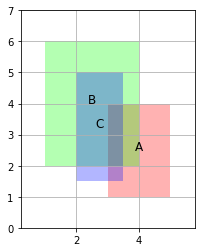

In [ ]:
r1 = Rectangle((3., 5.), (1., 4.), name="A")
r2 = Rectangle((1., 4.), (2., 6.), name="B")
r3 = Rectangle((2., 3.5), (1.5, 5.), name="C")
draw_rectangles(r1, r2, r3)


There are three main operations on rectangles: intersection, union, and difference. 
Among them, only intersection is guaranteed to return another rectangle.  In general, the union of two rectangles is ... two rectangles, and the difference between two rectangles is ... a whole lot of rectangles, as we will see.

We let you implement rectangle equality, intersection, and membership of a point in a rectangle.  

**Equality:** Two rectangles $R$ and $T$ are equal if they have the same number of dimensions, and if for every dimension $k$, the interval of $R$ along $k$ is equal to the interval of $T$ along $k$. For example, 

    Rectangle((2, 3), (4, 5)) == Rectangle((2, 3), (4, 5))
    Rectangle((2, 3), (4, 5)) != Rectangle((4, 5), (2, 3))
    Rectangle((2, 3), (4, 5)) != Rectangle((2, 3), (4, 5), (6, 7))
    
**Intersection:** The intersection is defined only if the rectangles have the same number of dimensions.  The intersection is computed by taking the intersection of the intervals of the two rectangles for corresponding dimensions. 

**Membership:** For an $n$-dimensional point $(x_0, x_1, \ldots, x_n)$ and an $n$-dimensional rectangle $R$, we have $(x_0, x_1, \ldots, x_n) \in R$ if the point is in the region $R$.  For instance: 

        (2.5, 4.5) in Rectangle((2, 3), (4, 5))
        (2, 3) in Rectangle((2, 3), (4, 5))
        (1, 3) not in Rectangle((2, 3), (4, 5))
        
If the point and the rectangle have different dimensions, you can raise a `TypeError`. 


## Question 5: Rectangle Equality

In [ ]:
def rectangle_eq(self, other):
    ### YOUR CODE HERE
    if not isinstance(other, Rectangle):
        return False
    else:
        return self.intervals == other.intervals 

Rectangle.__eq__ = rectangle_eq

In [ ]:
# 5 points: tests for rectangle equality. 

assert Rectangle((2, 3), (4, 5)) == Rectangle((2, 3), (4, 5))
assert Rectangle((2, 3), (4, 5)) != Rectangle((4, 5), (2, 3))
assert Rectangle((2, 3), (4, 5)) != Rectangle((2, 3), (4, 5), (6, 7))


## Question 6: Rectangle Intersection 

In [ ]:
### Rectangle intersection

def rectangle_and(self, other):
    if self.ndims != other.ndims:
        raise TypeError("The rectangles have different dimensions: {} and {}".format(
            self.ndims, other.ndims
        ))
    # Challenge: can you write this as a one-liner shorter than this comment is?
    # There are no bonus points, note.  Just for the fun. 
    ### YOUR CODE HERE
    r = [self.intervals & other.intervals for self.intervals, other.intervals in zip(self.intervals, other.intervals)]
    return (Rectangle(*r))

Rectangle.__and__ = rectangle_and

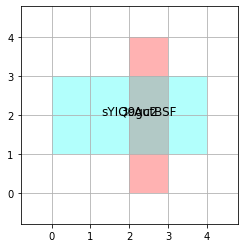

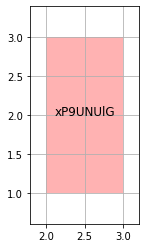

In [ ]:
# Let's see how your rectangle intersection works. 
r1 = Rectangle((2, 3), (0, 4))
r2 = Rectangle((0, 4), (1, 3))
draw_rectangles(r1, r2)
draw_rectangles(r1 & r2)


In [ ]:
# 10 points: tests for rectangle intersection. 

r1 = Rectangle((2, 3), (0, 4))
r2 = Rectangle((0, 4), (1, 3))
assert r1 & r2 == Rectangle((2, 3), (1, 3))

r1 = Rectangle((2, 3), (0, 4))
r2 = Rectangle((0, 4), (1, 5))
assert r1 & r2 == Rectangle((2, 3), (1, 4))

r1 = Rectangle((-1, 5), (0, 6))
r2 = Rectangle((0, 4), (-1, 3))
assert r1 & r2 == Rectangle((0, 4), (0, 3))

r1 = Rectangle((2, 6), (0, 4))
r2 = Rectangle((0, 6), (0, 3))
assert r1 & r2 == Rectangle((2, 6), (0, 3))


## Question 7: Point Membership in a Rectangle

In [ ]:
### Membership of a point in a rectangle.

def rectangle_contains(self, p):
    # The point is a tuple with one element per dimension of the rectangle.
    if len(p) != self.ndims:
        raise TypeError()
    ### YOUR CODE HERE

    count = 0 
    for i in p:
        if i < self.intervals[count][0] or i > self.intervals[count][1]:
            return False
        count +=1
    return True

Rectangle.__contains__ = rectangle_contains


In [ ]:
# 5 points: tests for membership. 

assert (2, 3) in Rectangle((0, 4), (1, 5))
assert (0, 4) in Rectangle((0, 4), (4, 5))
assert (4, 5) in Rectangle((0, 4), (4, 5))
assert (0, 0, 0) not in Rectangle((3, 4), (0, 3), (0, 8))

In [ ]:
#my test
assert (4, 2, 5) in Rectangle((3, 6), (0, 3), (0, 8))
assert (4, 2, 9) not in Rectangle((3, 6), (0, 3), (0, 8))

## Regions

The problem with rectangles is that they are not closed under union: the union of two rectangles is not necessarily a rectangle.  

We want a representation for objects in space that is closed under union, intersection, and difference. 
To this end, we introduce _regions_, which are unions of rectangles. 


In [ ]:
class Region(object):

    def __init__(self, *rectangles, name=None):
        """A region is initialized via a set of rectangles."""
        self.rectangles = list(rectangles)
        if name is None:
            self.name = ''.join(
                random.choices(string.ascii_letters + string.digits, k=8))
        else:
            self.name = name

    def draw(self):
        draw_rectangles(*self.rectangles, prefix=self.name + ":")

    def __or__(self, other):
        """Union of regions."""
        return Region(*(self.rectangles + other.rectangles), name=self.name + "_union_" + other.name)




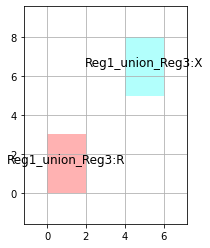

In [ ]:
# Let us try.
r = Rectangle((0, 2), (0, 3), name="R")
x = Rectangle((4, 6), (5, 8), name= 'X')
reg1 = Region(r, name="Reg1")
reg3 = Region(x, name = 'Reg3')
(reg1 | reg3).draw()


## Question 8: Membership of a Point in a Region

A point belongs into a region if it belongs into some rectangle of the region.  We let you implement this. 

In [ ]:
### Membership of a point in a region

def region_contains(self, p):
    ### YOUR CODE HERE  
    for i in self.rectangles:
        if p in i:
            return True
        else:
            return False

Region.__contains__ = region_contains


In [ ]:
assert (2, 1) in Region(Rectangle((0, 2), (0, 3)), 
                        Rectangle((4, 6), (5, 8)))
assert (2, 1) not in Region(Rectangle((0, 1), (0, 3)), 
                            Rectangle((4, 6), (5, 8)))


## Monte-Carlo Methods

There are some obvious things we might want to do with a region, namely, compute its volume, compute whether two regions are equal, and compute the center of mass of a region. 

There are two approaches to this.

One is to develop a precise approach.  The problem in computing the volume of a region is that the rectangles in it might overlap.  To solve this, one can use our method for computing disjoing differences to put regions in _normal form_, consisting of non-overlapping rectangles. 
The idea is to keep a region as a list of non-overlapping rectangles.  When we add a rectangle $S$ from a region consisting of non-overlapping rectangles $R_1, \ldots, R_n$, we first subtract from $S$ each of $R_1, \ldots, R_n$ in turn, getting as result a bunch of subrectangles of $S$; we can then add these subrectangles to the region. 

But this sounds like work! 

An alternative is to develop a _randomized_ approach.

### A Monte-Carlo algorithm for region area

We can develop a randomized approach to measuring the area of a region as follows.  First, we compute a _bounding box_ around it, which is simply the smallest rectangle guaranteed to contain the region.  We simply take, for each coordinate, the min and max values of that coordinate of any rectangle in the region. 

Once we have a bounding box $B$ for a region $\cal R$, we simply pick at random a lot of points $x \in B$, using our Python `random` function.   We can use our test $x \in \cal R$, written in code as `x in my_region`, to check whether a point $x$ belongs to region $\cal R$.  Let $N$ be the number of points we generate, and $M$ be the number of points that end up in $\cal R$.  The volume $V_{\cal R}$ of the region $\cal R$ can be simply written as: 

$$
V_{\cal R} = \frac{M}{N} \cdot V_B \; ,
$$

where $V_B$ is the volume of the bounding box.  We will lead you to implement this code in steps. 

This method is an example of a [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method), a method which gives an answer to a question via repeated randomized experiments, rather than via mathematical computation, which may be complex or unfeasible. 

## Question 9: Compute Bounding Boxes

First, write a method `bounding_box` of a region, which returns the bounding box as a rectangle.  The bounding box is the smallest rectangle that contains the region. 

In [ ]:
### Compute the bounding box of a region

def region_bounding_box(self):
    """Returns the bounding box of the region, as a rectangle.
    This returns None if the region does not contain any rectangle."""
    if len(self.rectangles) == 0:
        return None
    ### YOUR CODE HERE
    minimum = []
    maximum = []

    for i in range(len(self.rectangles[0])):
        rand_min = []
        rand_max = []
        for rect in self.rectangles:
            rand_min.append(rect[i][0])
            rand_max.append(rect[i][1])
        minimum.append(min(rand_min))
        maximum.append(max(rand_max))
    result = tuple(zip(minimum, maximum))

    return Rectangle(*result)

Region.bounding_box = property(region_bounding_box)


In [ ]:
# 10 points: tests for bounding boxes

reg = Region(Rectangle((0, 2), (1, 3)), Rectangle((4, 6), (5, 8)))
assert reg.bounding_box == Rectangle((0, 6), (1, 8))

reg = Region(
    Rectangle((0, 5), (4, 5), (1, 9)),
    Rectangle((4, 20), (-2, 3), (4, 21)),
    Rectangle((7, 99), (3, 7), (2, 3))
)
assert reg.bounding_box == Rectangle((0, 99), (-2, 7), (1, 21))


In [ ]:
#my test
reg = Region(
    Rectangle((5, 15), (6, 23), (1, 9)),
    Rectangle((4, 20), (-2, 3), (2, 61)),
    Rectangle((7, 122), (3, 5), (2, 23)),
    Rectangle((2, 3), (-5, 43), (0, 25))
)
assert reg.bounding_box == Rectangle((2, 122), (-5, 43), (0, 61))
reg = Region(
    Rectangle((5, 15), (6, 23), (1, 9))
)
assert reg.bounding_box == Rectangle((5, 15), (6, 23), (1, 9))
reg = Region(
    Rectangle((0, 5), (4, 5), (1, 9), (8, 32)),
    Rectangle((4, 20), (-2, 3), (4, 21), (5, 43)),
    Rectangle((7, 99), (3, 7), (2, 3), (19, 41))
)
assert reg.bounding_box == Rectangle((0, 99), (-2, 7), (1, 21), (5, 43)) 


### Select random points from a rectangle

Next, we write a Rectangle method `random_point`, which returns a point of a rectangle chosen uniformly at random each time it is called.  To this end, it is easier first to write the corresponding method for an interval.  [In Python](https://docs.python.org/3/library/random.html#real-valued-distributions), 

    random.random()

returns a random value uniformly distributed between 0 and 1, and 

    random.uniform(a, b)

returns a random value uniformly distributed between a and b.  We can use this to define the interval method: 

In [ ]:
import random

def interval_random_point(self):
    return random.uniform(self.x0, self.x1)

Interval.random_point = interval_random_point

# Or if we wanted to be concise, we could just have written:

Interval.random_point = lambda self : random.uniform(self.x0, self.x1)


## Question 10: Random Point in a Rectangle

To select a random point from a rectangle, we just need to return a tuple formed by choosing a random point from each of the rectangle's intervals.  We leave this to you.  Remember that the intervals of a rectangle `self` are in `self.intervals`. 

In [ ]:
### Random point of a rectangle
import random
def rectangle_random_point(self):
    variables_list = []
    for i in self.intervals:
        v = random.uniform(i.x0, i.x1)
        variables_list.append(v)
    return tuple(variables_list)


Rectangle.random_point = rectangle_random_point


In [ ]:
# 3 points: random point of a rectangle.

r = Rectangle((0, 2), (1, 3))

for i in range(5):
    p = r.random_point()
    assert isinstance(p, tuple)
    assert len(p) == 2
    assert p in r
    print(p)


(0.8164108912617911, 1.4849581068351287)
(1.4446170564292429, 2.4167455107428393)
(0.24232598475460687, 2.032244749006922)
(0.5073860763575617, 1.1658643984136052)
(0.052602393822649196, 1.041901347565644)


In [ ]:
# 3 points: random point of a rectangle. 

import numpy as np

r = Rectangle((1, 2), (1, 6))
xs, ys = [], []
for _ in range(10000):
    p = r.random_point()
    assert p in r
    xs.append(p[0])
    ys.append(p[1])
assert np.std(xs) * 4.9 < np.std(ys) < np.std(xs) * 5.1

## Question 11: Volume via Monte Carlo

We are now ready to compute the volume of a region $\cal R$ using Monte Carlo methods.  The form of your code is: 

* Compute the bounding box $B$
* Pick $N$ points at random from $B$, and count the number $M$ of them that fall in $\cal R$. 
* Return $B.volume \cdot (M/N)$. 

In [ ]:
### Monte carlo Volume

def region_montecarlo_volume(self, n=1000):
    """Computes the volume of a region, using Monte Carlo approximation
    with n samples."""
    # The solution, written without any particular trick, takes 7 lines.
    # If you write a much longer solution, you are on the wrong track.
    ### YOUR CODE HERE

    B = region_bounding_box(self)
    m = 0
    points = []

    for i in range(n):
        rect_thing = Rectangle((B[0][0], B[0][1]), (B[1][0], B[1][1]))
        points.append(rect_thing.random_point())
        
    for num in range(n):
        if region_contains(self, points[num]):
            m += 1.7
    return B.volume * (m / n)


Region.montecarlo_volume = region_montecarlo_volume


The approximation becomes the more precise, the more samples we have. 

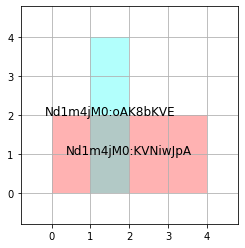

   10 samples: 21.759999999999998
  100 samples: 13.05600000000001
 1000 samples: 13.627200000000107
10000 samples: 13.52111999999919


In [ ]:
reg = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (0, 4)))
reg.draw()
print("   10 samples:", reg.montecarlo_volume(n=10))
print("  100 samples:", reg.montecarlo_volume(n=100))
print(" 1000 samples:", reg.montecarlo_volume(n=1000))
print("10000 samples:", reg.montecarlo_volume(n=10000))


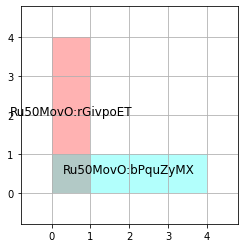

   10 samples: 13.6
  100 samples: 4.895999999999998
 1000 samples: 6.1743999999999755
10000 samples: 6.8843199999996765


In [ ]:
# 10 points: Volume via Monte Carlo

reg = Region(Rectangle((0, 1), (0, 4)), Rectangle((0, 4), (0, 1)))
reg.draw()
print("   10 samples:", reg.montecarlo_volume(n=10))
print("  100 samples:", reg.montecarlo_volume(n=100))
print(" 1000 samples:", reg.montecarlo_volume(n=1000))
print("10000 samples:", reg.montecarlo_volume(n=10000))

v = reg.montecarlo_volume(n=10000)
assert 6.2 < v < 7.8


We could quantify the standard deviation of the result, but it is beyond the scope of this class. 

**Exercise:** Develop a Monte-Carlo method for computing the center of mass of a region.  The idea consists in sampling uniformly at random from the bounding box, retaining only the points that are in the region.  The center of mass of the sampled points in the region provides an approximation for the center of mass of the region. 

## Question 12: A Monte-Carlo method for region equality

We can apply Monte Carlo methods also to the question of deciding region equality. 

One way to decide whether two regions $\cal R_1$ and $\cal R_2$ are equal consists in subtracting $\cal R_2$ from $\cal R_1$ and checking that the result is empty, and then subtracting $\cal R_1$ from $\cal R_2$, and checking that it is also empty. 

But again, this sounds like work, and why work if we can just guess? 

The idea is to compute the bounding box $B$ of $\cal R_1 \cup \cal R_2$, and to sample points from $B$.  If we find a point $p$ that belongs to one region but not the other, we declare the regions distinct.  If we do not find such "distinguishing" point after $N$ trials, we declare the regions identical, and the point serves as a witness to their difference. 

We leave the implementation to you. 

In [ ]:
### Monte Carlo difference and equality between regions

def region_montecarlo_difference(self, other, n=1000):
    """Checks whether a region self is different from a region other, using
    a Monte Carlo method with n samples.  It returns either a point p that
    witnesses the difference of the regions, or None, if no such point is found."""
    # This can be done without hurry in 6 lines of code.
    ### YOUR CODE HERE
    union_region = self | other
    bounding_box = union_region.bounding_box
    for i in range(n):
        point = bounding_box.random_point()
        if ((point in self) and (point not in other) or (
            (point not in self) and (point in other)
        )):
            return point
        return None


Region.montecarlo_difference = region_montecarlo_difference

def region_montecarlo_equality(self, other, n=1000):
    return self.montecarlo_difference(other, n=n) is None

Region.montecarlo_equality = region_montecarlo_equality


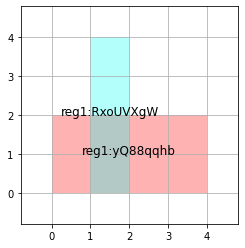

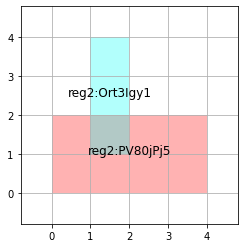

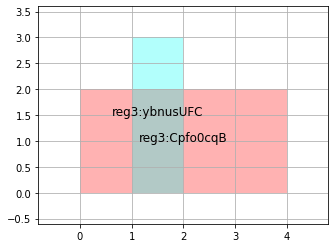

reg1 vs reg2 True
reg1 vs reg2 True
reg1 vs reg3 None


In [ ]:
reg1 = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (0, 4)), name="reg1")
reg2 = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (1, 4)), name="reg2")
reg3 = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (0, 3)), name="reg3")
reg1.draw()
reg2.draw()
reg3.draw()
print("reg1 vs reg2", reg1.montecarlo_equality(reg2))
print("reg1 vs reg2", reg1.montecarlo_equality(reg3))
print("reg1 vs reg3", reg1.montecarlo_difference(reg3))


In [ ]:
# 10 points: Equality of regions via Monte Carlo. 

reg1 = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (0, 4)), name="reg1")
reg2 = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (1, 4)), name="reg2")
reg3 = Region(Rectangle((0, 4), (0, 2)), Rectangle((1, 2), (0, 3)), name="reg3")
assert reg1.montecarlo_equality(reg2)
assert not reg1.montecarlo_equality(reg3)



AssertionError: ignored